In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression as LR

In [2]:
farmLink = pd.read_csv("farmLink.csv")
farmLink

,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
2,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
3,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
4,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18368,e8a15faf47a94501f30df33272fc03fd,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
18369,e23b9602b47f4417221dca835e623b87,subscribed,99,217,66,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
18370,bd3f2052fd4fc563391a7da2237bf44f,subscribed,105,42,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
18371,17f59717c69ed9b0e1076d343da875a7,subscribed,104,167,7,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN


In [3]:
print(farmLink.duplicated().sum())

828


In [4]:
farmLink_2 = farmLink.drop_duplicates()

In [5]:
print(farmLink_2.duplicated().sum())

0


In [6]:
farmLink_2 = farmLink_2.reset_index()
farmLink_2

,index,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
1,1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
2,3,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
3,5,6f6f6b553e98c17511288f863d274e4c,subscribed,113,42,0,0,0,0,4/24/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
4,6,c7c9e65b8729d427e68e71a209e8a0be,subscribed,112,43,3,200,0,200,4/24/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17540,18365,811d95cd7ea34bb668a98c7f43eeea65,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17541,18366,3af3e59097f576efe5dab7b5c8089c5e,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17542,18367,d245e3721c746e4dcb57b2226bd8550c,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17543,18368,e8a15faf47a94501f30df33272fc03fd,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN


In [7]:
farmLink_2.rename(columns={"index": "orig_index"})

,orig_index,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
1,1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
2,3,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
3,5,6f6f6b553e98c17511288f863d274e4c,subscribed,113,42,0,0,0,0,4/24/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
4,6,c7c9e65b8729d427e68e71a209e8a0be,subscribed,112,43,3,200,0,200,4/24/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17540,18365,811d95cd7ea34bb668a98c7f43eeea65,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17541,18366,3af3e59097f576efe5dab7b5c8089c5e,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17542,18367,d245e3721c746e4dcb57b2226bd8550c,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17543,18368,e8a15faf47a94501f30df33272fc03fd,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN


In [8]:
farmLink_2[farmLink_2["lastgiftamount"] == "lastgiftamount"].index

Int64Index([10294], dtype='int64')

In [9]:
farmLink_2.iloc[10294]

index                                10704
id                                      id
status                              status
Sends                                Sends
Opens                                Opens
Clicks                              Clicks
lifetodategiving          lifetodategiving
yeartodategiving          yeartodategiving
lastgiftamount              lastgiftamount
lastgiftdate                  lastgiftdate
ContactType                    ContactType
MonetaryTier                  MonetaryTier
DonorStatus                    DonorStatus
IndividualDonorType    IndividualDonorType
Tier3Classification    Tier3Classification
Name: 10294, dtype: object

index 10294 is a copy of column names

In [10]:
farmLink_2 = farmLink_2.drop(10294)
farmLink_2

,index,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
1,1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
2,3,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
3,5,6f6f6b553e98c17511288f863d274e4c,subscribed,113,42,0,0,0,0,4/24/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
4,6,c7c9e65b8729d427e68e71a209e8a0be,subscribed,112,43,3,200,0,200,4/24/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17540,18365,811d95cd7ea34bb668a98c7f43eeea65,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17541,18366,3af3e59097f576efe5dab7b5c8089c5e,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17542,18367,d245e3721c746e4dcb57b2226bd8550c,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17543,18368,e8a15faf47a94501f30df33272fc03fd,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN


In [11]:
farmLink_2.shape

(17544, 15)

15 columns (including original index), 17544 entries

In [12]:
farmLink_2.columns

Index(['index', 'id', 'status', 'Sends', 'Opens', 'Clicks', 'lifetodategiving',
       'yeartodategiving', 'lastgiftamount', 'lastgiftdate', 'ContactType',
       'MonetaryTier', 'DonorStatus', 'IndividualDonorType',
       'Tier3Classification'],
      dtype='object')

In [13]:
farmLink_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17544 entries, 0 to 17544
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   index                17544 non-null  int64 
 1   id                   17544 non-null  object
 2   status               17544 non-null  object
 3   Sends                17544 non-null  object
 4   Opens                17544 non-null  object
 5   Clicks               17544 non-null  object
 6   lifetodategiving     17544 non-null  object
 7   yeartodategiving     17544 non-null  object
 8   lastgiftamount       17544 non-null  object
 9   lastgiftdate         10294 non-null  object
 10  ContactType          17544 non-null  object
 11  MonetaryTier         10609 non-null  object
 12  DonorStatus          10609 non-null  object
 13  IndividualDonorType  10295 non-null  object
 14  Tier3Classification  10347 non-null  object
dtypes: int64(1), object(14)
memory usage: 2.1+ MB


columns: lastgiftdate, MonetaryTier, DonorStatus, IndividualDonorType, Tier3Classification have null values.

In [14]:
farmLink_2.isnull().sum()

index                     0
id                        0
status                    0
Sends                     0
Opens                     0
Clicks                    0
lifetodategiving          0
yeartodategiving          0
lastgiftamount            0
lastgiftdate           7250
ContactType               0
MonetaryTier           6935
DonorStatus            6935
IndividualDonorType    7249
Tier3Classification    7197
dtype: int64

In [15]:
farmLink_2.describe()

,index
count,17544.000000
mean,9108.704514
std,5240.699114
min,0.000000
25%,4597.750000
50%,9117.500000
75%,13621.250000
max,18372.000000


In [16]:
farmLink_2["id"].value_counts()

beb474eeb891950d175154e253c1259d    3
7b5ccac7b446a5c961fe2d84856ce81e    3
4c25fa1101a812d3b7baccb8c83e02e8    3
988b2177df4d5fe5ce1a18aa40d55ac3    3
07b78cd286bd2bc9dc46226337c15b25    2
                                   ..
3bad7279df05a0f87188790400705abe    1
fe781f47acdd0fa223be2a80a3e88d15    1
9ccdfad3bbbc2a0e35fdce38d88791c2    1
7fad59bbe1593b2c05771af9ccb56f74    1
bebdec96b3a33381399673e52458ba3a    1
Name: id, Length: 17338, dtype: int64

17338 unique ids

<AxesSubplot:>

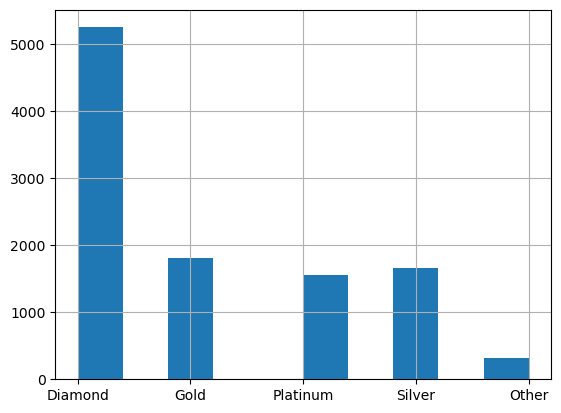

In [17]:
farmLink_2["MonetaryTier"].hist()

In [18]:
farmLink_2["MonetaryTier"].value_counts()

Diamond     5252
Gold        1810
Silver      1665
Platinum    1563
Other        319
Name: MonetaryTier, dtype: int64

Surprisingly, Diamond tier has the highest count of members. "Other" represents NaN values

In [19]:
giftAmount = farmLink_2["lastgiftamount"]
giftAmount = giftAmount.astype(int)
giftAmount.sum()

1006771

total gift amount: $1,006,771

In [20]:
clicks = farmLink_2["Clicks"].astype(int)
clicks

0         2
1         3
2         2
3         0
4         3
         ..
17540     0
17541     0
17542     0
17543     0
17544    10
Name: Clicks, Length: 17544, dtype: int64

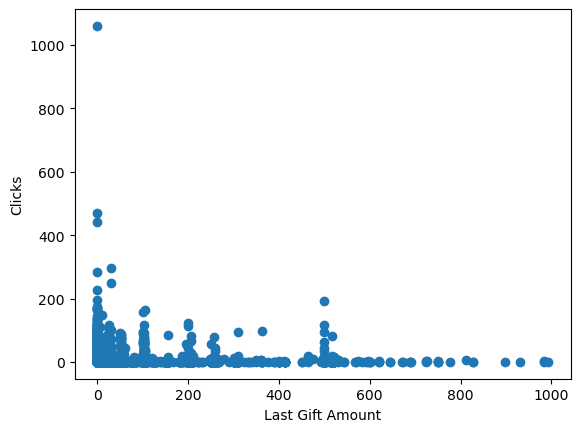

In [21]:
plt.scatter(giftAmount, clicks)
plt.xlabel("Last Gift Amount")
plt.ylabel("Clicks");

Text(0.5, 1.0, 'Y-range:0 - 10')

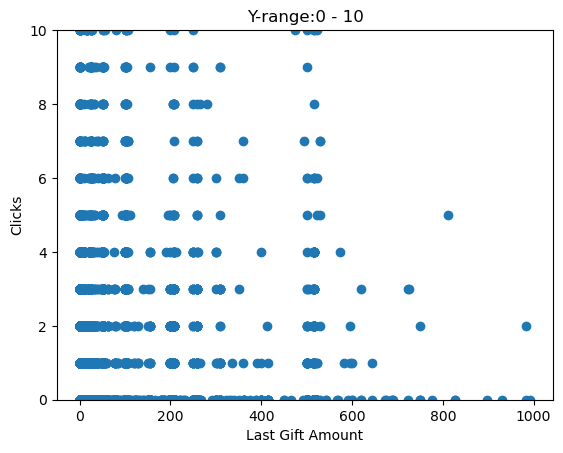

In [22]:
plt.scatter(giftAmount, clicks)
plt.xlabel("Last Gift Amount")
plt.ylabel("Clicks")
plt.ylim(0, 10)
plt.title("Y-range:0 - 10")

From the graph above, there are many gifts with zero clicks. Plot shape makes sense since clicks are discrete.

In [23]:
farmLink_zc = farmLink_2[farmLink_2["Clicks"] == "0"]
farmLink_zc[farmLink_zc["ContactType"] == "Donor"]

,index,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
3,5,6f6f6b553e98c17511288f863d274e4c,subscribed,113,42,0,0,0,0,4/24/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
5,8,85be7b6d968ac99800091726b107c887,unsubscribed,35,6,0,25,0,25,4/25/2020,Donor,Silver,SingleDonor,Single Donor,Single Donor
8,11,d46b6cde82cc675bb5cbd1fa4cfe176c,subscribed,114,93,0,50,0,50,4/25/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
10,13,3039afd00fd3a6c4e94c3512500c86ef,subscribed,113,0,0,100,0,100,4/25/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
12,16,7244ab4036d24fd2560de91a281485ac,subscribed,113,122,0,500,0,500,4/28/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10266,10675,4c63863ab0a169f1d97249b806075d23,subscribed,42,29,0,230,167,21,8/24/2022,Donor,Silver,Recurring Donor - Active,Multiple Single Donations,Monthly
10267,10676,4e09dcd8e3448dda2913b85c79c387a3,subscribed,42,56,0,626,417,52,8/24/2022,Donor,Diamond,Recurring Donor - Active,Multiple Single Donations,Monthly
10277,10686,e455a7c64cf55d0b00448d2a6766f3ad,subscribed,86,8,0,751,234,59,8/27/2022,Donor,Diamond,Recurring Donor - Active,Multiple Single Donations,Monthly
10282,10691,be36a656c7a56d847114b2c54fa15f06,subscribed,8,0,0,265,265,265,8/30/2022,Donor,Platinum,SingleDonor,Single Donor,Single Donor


In [24]:
(farmLink_zc[farmLink_zc["ContactType"] == "Non-Donor"]["lastgiftamount"].astype(int) > 0).value_counts()

False    5439
Name: lastgiftamount, dtype: int64

Checked if non-donor means no donations.

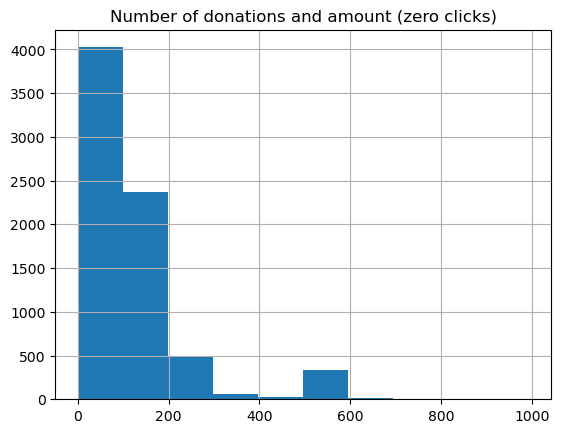

In [42]:
farmLink_zc[farmLink_zc["ContactType"] == "Donor"]["lastgiftamount"].astype(int).hist()
plt.title("Number of donations and amount (zero clicks)");

In [26]:
farmLink_zc[farmLink_zc["ContactType"] == "Donor"]["lastgiftamount"].astype(int).max()

993

In [27]:
farmLink_zc[farmLink_zc["ContactType"] == "Donor"]["lastgiftamount"].astype(int).mean()

96.65373582843874

For zero click donors, the max donation is 993 and the mean donation is around 96.7

In [34]:
dates =farmLink_2["lastgiftdate"].dropna()
dates

0        4/23/2020
1        4/23/2020
2        4/23/2020
3        4/24/2020
4        4/24/2020
           ...    
10289     9/2/2022
10290     9/5/2022
10291     9/6/2022
10292     9/6/2022
10293     9/6/2022
Name: lastgiftdate, Length: 10294, dtype: object

There have been 10294 donations

In [36]:
lastgiftdate = [dt.datetime.strptime(date, "%m/%d/%Y") for date in dates]

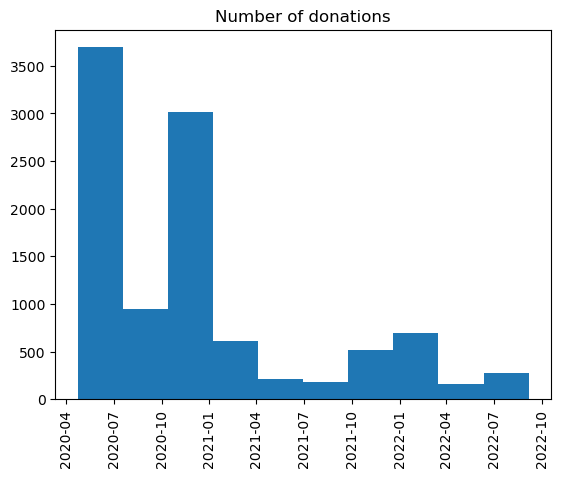

In [40]:
plt.hist(lastgiftdate)
plt.xticks(rotation=90)
plt.title("Number of donations");

Donations have decreased signicantly in the past 3 years

In [43]:
farmLink_2

,index,id,status,Sends,Opens,Clicks,lifetodategiving,yeartodategiving,lastgiftamount,lastgiftdate,ContactType,MonetaryTier,DonorStatus,IndividualDonorType,Tier3Classification
0,0,89ce7fad62fd5b95aaadaa1edb786cc0,subscribed,112,3,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
1,1,778fdf5a21efed6e372e0e0bc159f92d,subscribed,112,112,3,50,0,50,4/23/2020,Donor,Gold,SingleDonor,Single Donor,Single Donor
2,3,cec49095c9aef6252fbd30aae5345792,subscribed,112,29,2,200,0,200,4/23/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
3,5,6f6f6b553e98c17511288f863d274e4c,subscribed,113,42,0,0,0,0,4/24/2020,Donor,Platinum,SingleDonor,Single Donor,Single Donor
4,6,c7c9e65b8729d427e68e71a209e8a0be,subscribed,112,43,3,200,0,200,4/24/2020,Donor,Diamond,SingleDonor,Single Donor,Single Donor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17540,18365,811d95cd7ea34bb668a98c7f43eeea65,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17541,18366,3af3e59097f576efe5dab7b5c8089c5e,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17542,18367,d245e3721c746e4dcb57b2226bd8550c,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN
17543,18368,e8a15faf47a94501f30df33272fc03fd,subscribed,0,0,0,0,0,0,NaN,Non-Donor,NaN,NaN,NaN,NaN


In [45]:
clicks

0         2
1         3
2         2
3         0
4         3
         ..
17540     0
17541     0
17542     0
17543     0
17544    10
Name: Clicks, Length: 17544, dtype: int64

In [46]:
sends = farmLink_2["Sends"].astype(int)
sends

0        112
1        112
2        112
3        113
4        112
        ... 
17540      0
17541      0
17542      0
17543      0
17544     24
Name: Sends, Length: 17544, dtype: int64

In [51]:
model = LR()
clicks_array = clicks.values
sends_array = sends.values.reshape(-1,1)

In [53]:
model.fit(sends_array, clicks_array)

LinearRegression()

In [54]:
print(model.score(sends_array, clicks_array))

0.005728092825573627


I could do more but yeah...